In [11]:
# KNN IMPLEMENTATION using scikit learn

# Importing dependencies
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sb 

In [12]:
# Import Training and Testing Data

dfTrain = pd.read_csv("../Data/TrainingData.csv")
dfTest = pd.read_csv("../Data/TestingData.csv")

# Define Features and Targets 

targetsTrain = dfTrain["home_team_result"]
featuresTrain = dfTrain.drop(["home_team_name","away_team_name","home_team_goal_count","away_team_goal_count","winner_encoded","home_team_result"],axis=1)

targetsTest = dfTest["home_team_result"]
featuresTest = dfTest.drop(["home_team_name","away_team_name","home_team_goal_count","away_team_goal_count","home_team_result"],axis=1)

Minimum error:- 0.5625 at K = 13


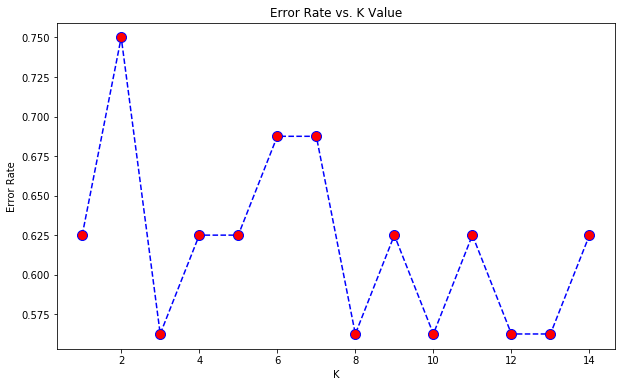

In [13]:
# Find Optimal Value of k
error_rate = []
for i in range(1,15):
 knn = KNeighborsClassifier(n_neighbors=i,metric='hamming')
 knn.fit(featuresTrain,targetsTrain)
 predictionTest_i = knn.predict(featuresTest)
 error_rate.append(np.mean(predictionTest_i != targetsTest))

# Calculate Index with Minimum Error Rate
k_min = 100000
for i in range(0,14):
    if error_rate[i] <= k_min:
        k_min = error_rate[i]
        k_index = i + 1
        
# Generate Graph
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =", k_index)

k = k_index

In [14]:
# Training for KNN
neigh = KNeighborsClassifier(n_neighbors = k,metric='hamming').fit(featuresTrain, targetsTrain)
predictionTest = neigh.predict(featuresTest)
print("Accuracy of model at K =", k ,"is",metrics.accuracy_score(targetsTest, predictionTest))

print("Target Values:    ", targetsTest.values)
print("Predicted Values: ", predictionTest) 

Accuracy of model at K = 13 is 0.4375
Target Values:     [1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.]
Predicted Values:  [1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1.]


Experiments with Larger Training Data

Minimum error:- 0.25 at K = 11
Accuracy of model at K = 11 is 0.75
Target Values:     [1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.]
Predicted Values:  [1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1.]


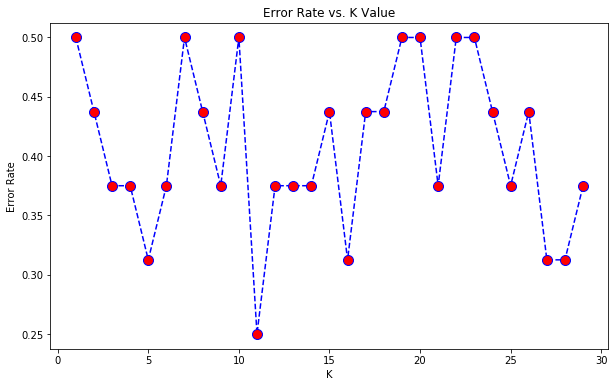

In [15]:
# Import Training and Testing Data

dfTrain = pd.read_csv("../Data/LargeTrainingData.csv")
dfTest = pd.read_csv("../Data/LargeTestingData.csv")

# Define Features and Targets 

targetsTrain = dfTrain["home_team_result"]
featuresTrain = dfTrain.drop(["home_team_name","away_team_name","home_team_goal_count","away_team_goal_count","winner_encoded","home_team_result"],axis=1)

targetsTest = dfTest["home_team_result"]
featuresTest = dfTest.drop(["home_team_name","away_team_name","home_team_goal_count","away_team_goal_count","home_team_result"],axis=1)

# Find Optimal Value of k
error_rate = []
for i in range(1,30):
 knn = KNeighborsClassifier(n_neighbors=i,metric='hamming')
 knn.fit(featuresTrain,targetsTrain)
 predictionTest_i = knn.predict(featuresTest)
 error_rate.append(np.mean(predictionTest_i != targetsTest))

# Calculate Index with Minimum Error Rate
k_min = 100000
for i in range(0,29):
    if error_rate[i] <= k_min:
        k_min = error_rate[i]
        k_index = i + 1
        
# Generate Graph
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =", k_index)

k = k_index

# Training for KNN
neigh = KNeighborsClassifier(n_neighbors = k,metric='hamming').fit(featuresTrain, targetsTrain)
predictionTest = neigh.predict(featuresTest)
print("Accuracy of model at K =", k ,"is",metrics.accuracy_score(targetsTest, predictionTest))

print("Target Values:    ", targetsTest.values)
print("Predicted Values: ", predictionTest) 